波士顿数据集LASSO回归的SGD实现

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [24]:
X,y=load_boston(return_X_y=True)
tra_X=torch.tensor(X[0:380,:]).float()
tra_y=torch.tensor(y[0:380]).float()
tes_X=torch.tensor(X[380:,:]).float()
tes_y=torch.tensor(y[380:]).float()

In [25]:
class LASSO_regress(nn.Module):
    def __init__(self):
        super(LASSO_regress,self).__init__()
        self.func=nn.Linear(13,1)
    def forward(self,x):
        return self.func(x)

准备损失函数

In [26]:
loss_fun1=nn.MSELoss()
loss_fun2=nn.L1Loss()

训练前定义网络与优化器

In [27]:
mod=LASSO_regress()
optimizer=optim.SGD(mod.parameters(),lr=0.0000004)

train error: tensor(47.5419, grad_fn=<AddBackward0>)


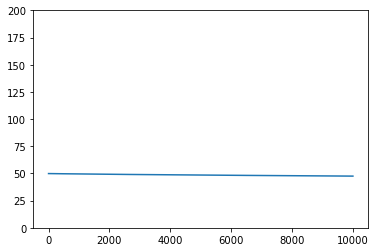

In [57]:
lambda_L1=1
recorder=np.zeros(10000)
for i in range(0,10000):
    optimizer.zero_grad()
    pre=mod(tra_X)   
    penalty=0
    for name,par in mod.named_parameters():
        if 'weight' in name:
            penalty=penalty+lambda_L1*loss_fun2(par,torch.zeros(par.shape))
    loss=loss_fun1(pre.squeeze(),tra_y)+penalty
    recorder[i]=loss
    loss.backward()
    optimizer.step()


plt.plot(recorder)
plt.ylim(0,200)
print('train error:',loss)

In [58]:
for par in mod.parameters():
    print(par)

Parameter containing:
tensor([[ 0.0034,  0.0760, -0.0043,  0.0024,  0.0007,  0.0471,  0.0778, -0.0178,
          0.0360,  0.0022, -0.0174,  0.0661, -0.6631]], requires_grad=True)
Parameter containing:
tensor([-0.0348], requires_grad=True)


比较训练与测试误差

In [59]:
tes_pre=mod(tes_X)
print('test error:',loss_fun1(tes_pre.squeeze(),tes_y))
tra_pre=mod(tra_X)
print('train error:',loss_fun1(tra_pre.squeeze(),tra_y))

test error: tensor(97.6328, grad_fn=<MseLossBackward0>)
train error: tensor(47.4637, grad_fn=<MseLossBackward0>)


用sklearn包进行回归，与我们误差进行对比

In [60]:
from sklearn.linear_model import LinearRegression
tra_X2=X[0:380,:]
tra_y2=y[0:380]
tes_X2=X[380:,:]
tes_y2=y[380:]
reg = LinearRegression().fit(tra_X2,tra_y2)
print(np.mean((reg.predict(tra_X2)-tra_y2)**2))
print(np.mean((reg.predict(tes_X2)-tes_y2)**2))

21.198414282847672
61.14752263950204
